In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import math

{'1101': 277, '0111': 268, '0001': 247, '0100': 232}


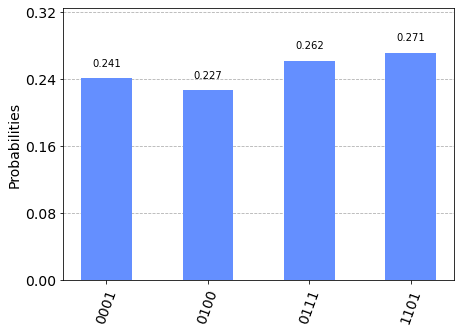

In [2]:
def qft(qc,qr,n):
    for i in range(n):
        for j in range(i):
            qc.cu1(math.pi/float(2**(i-j)), qr[i], qr[j])
        qc.h(qr[i])


def iqft(qc, qr, n):
    for i in range(n):
        for j in range(i):
            qc.cu1(-math.pi/float(2**(i-j)), qr[j], qr[i])
        qc.h(qr[i])
        
def swap(qci, s1, s2):
    qci.cx(s1, s2)
    qci.cx(s2, s1)
    qci.cx(s1, s2)

nx = 3
ny = 4
nc = 4
qx = QuantumRegister(nx, "xq")
qy = QuantumRegister(ny, "yq")
c = ClassicalRegister(nc)
qc = QuantumCircuit(qx, qy, c)

qc.h(qx)

#qc.x(qy[3])
#qc.cx(qx[2], qy[1])
#qc.cx(qx[2], qy[2])
#qc.cx(qx[1], qy[1])
#qc.cx(qx[1], qy[3])
#qc.ccx(qx[1], qx[2], qy[0])
#qc.ccx(qx[1], qx[2], qy[1])
#qc.ccx(qx[1], qx[2], qy[2])
#qc.ccx(qx[1], qx[2], qy[3])
#qc.barrier(qx)

# x=000 - y=0001, pq não houve outra operação
qc.x(qy[0])

# x=001 - y=0111, se qy[2] for 0, substitui por qx[1] se ele for igual a 1, 
# como ele esta superposto acontence os dois casos
qc.cx(qx[1], qy[2])
qc.cx(qx[1], qy[1])

# x=010 - y=0100
qc.cx(qx[2], qy[2])
qc.cx(qx[2], qy[0])

# x=011 - y=1101
qc.ccx(qx[2], qx[1], qy[3])

# repeat
qc.ccx(qx[2], qx[1], qy[2])
qc.ccx(qx[2], qx[1], qy[1])
qc.ccx(qx[2], qx[1], qy[0])

#qc.barrier(qx)
#iqft(qc, qx, nx) 
#swap(qc, qx[0], qx[2])

qc.measure(qy, c) # mede as fases adicionadas em x

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [3]:
S = list(counts.keys())
S = [int(i,2) for i in S]
A = 2**3
S
# S/8 = K/T
#[A/s for s in S[1:]]

[13, 7, 1, 4]

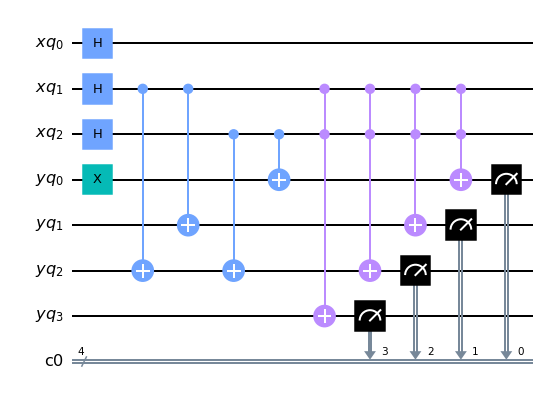

In [4]:
qc.draw(output='mpl')

In [5]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_belem')

job = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

In [ ]:
result = job.result()
print(result)

In [ ]:
counts_exp = result.get_counts(qc)
plot_histogram([counts_exp,counts])